In [1]:
import mlflow
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from biological_fuzzy_logic_networks.DREAM_analysis.model_analysis_utils import get_test_data_formatted

/Users/adr/miniconda3/envs/biofuzznet/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [30]:
col22 = ["#fdfdfd", "#1d1d1d", "#ebce2b", "#702c8c", "#db6917", "#96cde6", "#ba1c30", "#c0bd7f", "#7f7e80", 
         "#5fa641", "#d485b2", "#4277b6", "#df8461", "#463397", "#e1a11a", "#91218c", "#e8e948", "#7e1510", 
         "#92ae31", "#6f340d", "#d32b1e", "#2b3514"]
         

In [2]:
client = mlflow.tracking.MlflowClient(tracking_uri="http://localhost:5000")

In [3]:
exp_id = client.get_experiment_by_name("Subnetwork").experiment_id
runs = client.search_runs(experiment_ids=exp_id, max_results=3500)
runs_df = pd.DataFrame([{**dict(run.info), **run.data.params, **run.data.metrics} for run in runs])
runs_df = runs_df.drop(columns = ['artifact_uri', 'end_time', 'experiment_id', 'lifecycle_stage', 
                                  'run_uuid', 'start_time', 'status', 'user_id'])

In [4]:
runs_df["learning_rate"].max()

'0.1'

In [5]:
runs = runs_df[~runs_df["test_mse_RB"].isna()]

In [6]:
runs.dtypes[runs.dtypes!="float64"]

run_id                 object
run_name               object
ccc_job_id             object
pkn_sif                object
network_class          object
output_dir             object
time_point             object
non_marker_cols        object
treatment_col_name     object
minmaxscale            object
add_root_values        object
root_nodes             object
input_value            object
train_treatments       object
valid_treatments       object
train_cell_lines       object
valid_cell_lines       object
convergence_check      object
replace_zero_inputs    object
inhibition_value       object
learning_rate          object
n_epochs               object
batch_size             object
tensors_to_cuda        object
checkpoint_path        object
experiment_name        object
optimizer              object
cell_lines             object
test_cell_lines        object
param_setting          object
dtype: object

In [7]:
runs['n_epochs'] = runs["n_epochs"].astype(int)
runs['batch_size'] = runs["batch_size"].astype(int)
runs['learning_rate'] = runs["n_epochs"].astype(float)

/var/folders/54/s3nhktxs0tz7w0f6tsj6pltc0000kp/T/ipykernel_47026/1076726270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runs['n_epochs'] = runs["n_epochs"].astype(int)
/var/folders/54/s3nhktxs0tz7w0f6tsj6pltc0000kp/T/ipykernel_47026/1076726270.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runs['batch_size'] = runs["batch_size"].astype(int)
/var/folders/54/s3nhktxs0tz7w0f6tsj6pltc0000kp/T/ipykernel_47026/1076726270.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [8]:
runs["param_number"] = [setting.split("_")[0] for setting in runs["param_setting"]]
all_cv_params = list((runs.groupby("param_number").size()[runs.groupby("param_number").size()==5]).index)
sel_runs = runs[runs["param_number"].isin(all_cv_params)]
avg_runs = sel_runs.groupby("param_number").mean().reset_index(drop=False)

/var/folders/54/s3nhktxs0tz7w0f6tsj6pltc0000kp/T/ipykernel_47026/819637499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runs["param_number"] = [setting.split("_")[0] for setting in runs["param_setting"]]
/var/folders/54/s3nhktxs0tz7w0f6tsj6pltc0000kp/T/ipykernel_47026/819637499.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_runs = sel_runs.groupby("param_number").mean().reset_index(drop=False)


In [9]:
avg_runs

,param_number,learning_rate,n_epochs,batch_size,valid_loss,test_r2_cleavedCas,test_r2_AKT_S473,test_r2_AKT_T308,test_r2_AMPK,test_r2_CREB,...,test_mse_p38,test_mse_p53,test_mse_p90RSK,test_mse_RB,test_mse_SMAD23,test_mse_SRC,test_mse_EGFR,test_mse,train_loss,best_val_loss
0,0,10.0,10.0,10000.0,0.036672,-1.206302,1.0,1.0,1.0,-1.507855,...,0.022500,0.042343,0.161501,0.066656,6.403033e-33,3.008143e-33,0.0,0.038936,0.036920,0.036672
1,1,50.0,50.0,10000.0,0.039419,-0.686132,1.0,1.0,1.0,-0.465442,...,0.016588,0.037797,0.176548,0.062860,6.403033e-33,3.008143e-33,0.0,0.041632,0.039551,0.039419
2,10,50.0,50.0,10000.0,0.038467,-0.845578,1.0,1.0,1.0,-1.598574,...,0.025504,0.039351,0.165322,0.066066,6.403033e-33,3.008143e-33,0.0,0.040649,0.038709,0.038467
3,12,10.0,10.0,10000.0,0.040460,-1.070766,1.0,1.0,1.0,-1.099467,...,0.017426,0.039307,0.176941,0.061320,6.403033e-33,3.008143e-33,0.0,0.042352,0.040734,0.040460
4,13,50.0,50.0,10000.0,0.033646,-0.898740,1.0,1.0,1.0,-1.492201,...,0.015824,0.038645,0.151469,0.057713,6.403033e-33,3.008143e-33,0.0,0.035131,0.033168,0.033646
5,15,10.0,10.0,10000.0,0.028539,-0.901542,1.0,1.0,1.0,-0.864836,...,0.017024,0.040581,0.140150,0.060107,6.403033e-33,3.008143e-33,0.0,0.029461,0.028017,0.028539
6,16,50.0,50.0,10000.0,0.025666,-0.253310,1.0,1.0,1.0,-0.867991,...,0.046240,0.029133,0.127200,0.058797,6.403033e-33,3.008143e-33,0.0,0.028086,0.025667,0.025666
7,18,10.0,10.0,10000.0,0.031985,-0.577542,1.0,1.0,1.0,-1.024152,...,0.030469,0.042653,0.149413,0.058760,6.403033e-33,3.008143e-33,0.0,0.033959,0.031993,0.031985
8,19,50.0,50.0,10000.0,0.017019,-0.239494,1.0,1.0,1.0,-0.476271,...,0.014237,0.025214,0.065441,0.054818,6.403033e-33,3.008143e-33,0.0,0.019304,0.017323,0.017019
9,21,10.0,10.0,50000.0,0.039214,-0.496634,1.0,1.0,1.0,-1.838421,...,0.015234,0.034296,0.169107,0.062680,6.403033e-33,3.008143e-33,0.0,0.040553,0.039085,0.039214


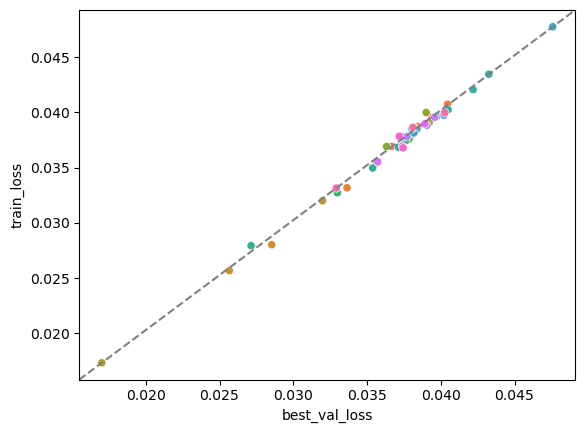

In [10]:
ax = sns.scatterplot(data=avg_runs, x="best_val_loss", y="train_loss", hue="param_number", legend=False)
ax.plot([0,1], [0,1], transform=ax.transAxes, linestyle="--", color="grey")

<AxesSubplot: xlabel='n_epochs', ylabel='valid_loss'>

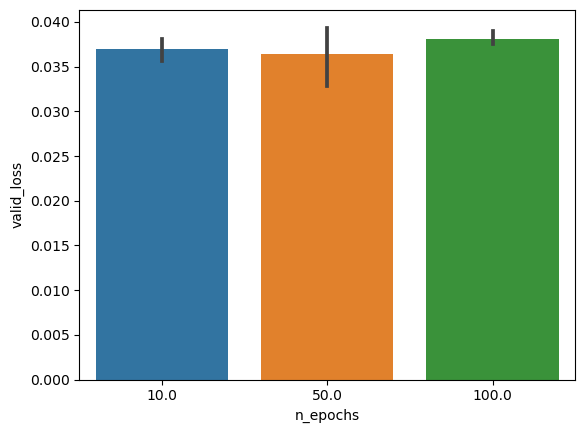

In [11]:
sns.barplot(data=avg_runs, x="n_epochs", y="valid_loss")

<AxesSubplot: xlabel='batch_size', ylabel='valid_loss'>

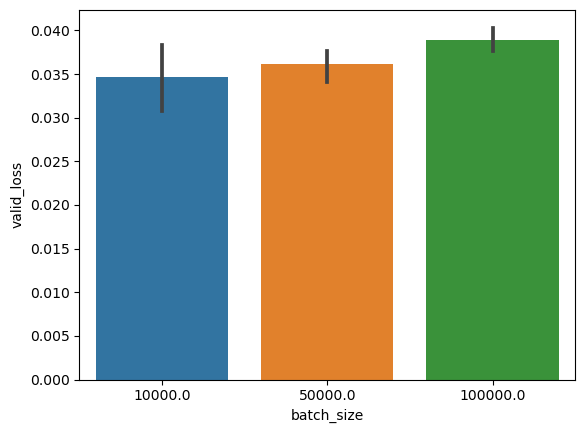

In [12]:
sns.barplot(data=avg_runs, x="batch_size", y="valid_loss")

<AxesSubplot: xlabel='learning_rate', ylabel='valid_loss'>

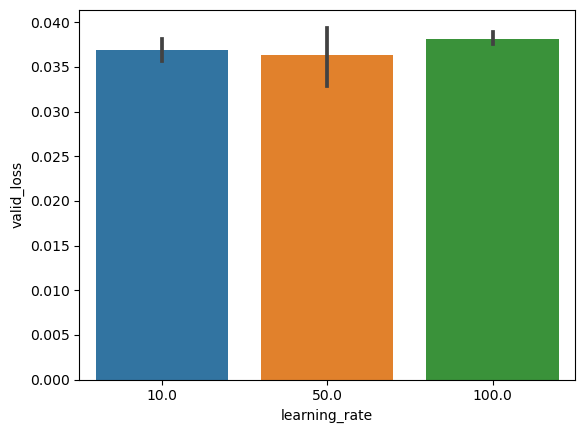

In [13]:
sns.barplot(data=avg_runs, x="learning_rate", y="valid_loss")

In [34]:
val_r2 = pd.melt(frame=avg_runs, id_vars = "param_number", value_vars=['val_r2_cleavedCas', 'val_r2_AKT_S473',
       'val_r2_AKT_T308', 'val_r2_AMPK', 'val_r2_CREB', 'val_r2_ERK12',
       'val_r2_FAK', 'val_r2_GSK3B', 'val_r2_H3', 'val_r2_JNK',
       'val_r2_MAPKAPK2', 'val_r2_MEK12', 'val_r2_MKK36', 'val_r2_MKK4',
       'val_r2_p38', 'val_r2_p53', 'val_r2_p90RSK', 'val_r2_RB',
       'val_r2_SMAD23', 'val_r2_SRC', 'val_r2_EGFR'], var_name="node", value_name="val_r2")
test_r2 = pd.melt(frame=avg_runs, id_vars = "param_number", value_vars=['test_r2_cleavedCas',
       'test_r2_AKT_S473', 'test_r2_AKT_T308', 'test_r2_AMPK', 'test_r2_CREB',
       'test_r2_ERK12', 'test_r2_FAK', 'test_r2_GSK3B', 'test_r2_H3',
       'test_r2_JNK', 'test_r2_MAPKAPK2', 'test_r2_MEK12', 'test_r2_MKK36',
       'test_r2_MKK4', 'test_r2_p38', 'test_r2_p53', 'test_r2_p90RSK',
       'test_r2_RB', 'test_r2_SMAD23', 'test_r2_SRC', 'test_r2_EGFR'], 
        var_name="node", value_name="test_r2")
palette = dict(zip(['val_r2_cleavedCas', 'val_r2_AKT_S473',
       'val_r2_AKT_T308', 'val_r2_AMPK', 'val_r2_CREB', 'val_r2_ERK12',
       'val_r2_FAK', 'val_r2_GSK3B', 'val_r2_H3', 'val_r2_JNK',
       'val_r2_MAPKAPK2', 'val_r2_MEK12', 'val_r2_MKK36', 'val_r2_MKK4',
       'val_r2_p38', 'val_r2_p53', 'val_r2_p90RSK', 'val_r2_RB',
       'val_r2_SMAD23', 'val_r2_SRC', 'val_r2_EGFR'], col22))

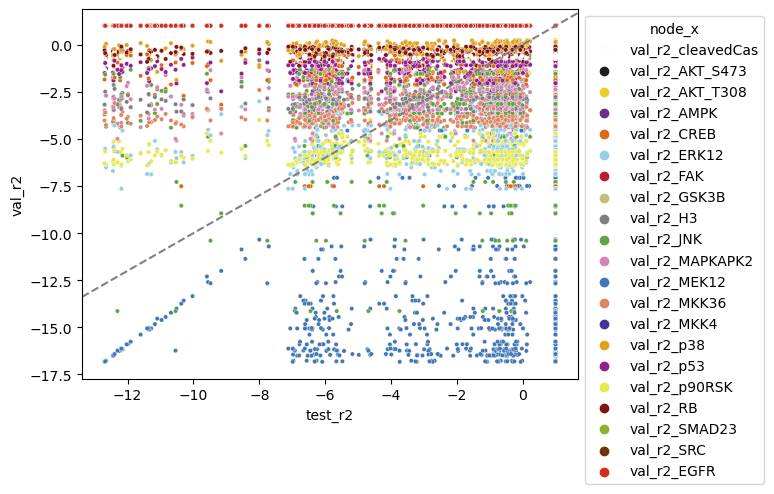

In [38]:
temp = pd.merge(val_r2, test_r2, on="param_number")
ax=sns.scatterplot(data=temp, x="test_r2", y="val_r2", hue="node_x", s=10, palette=palette)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.axline((0,0), slope=1, linestyle="--", color="grey")

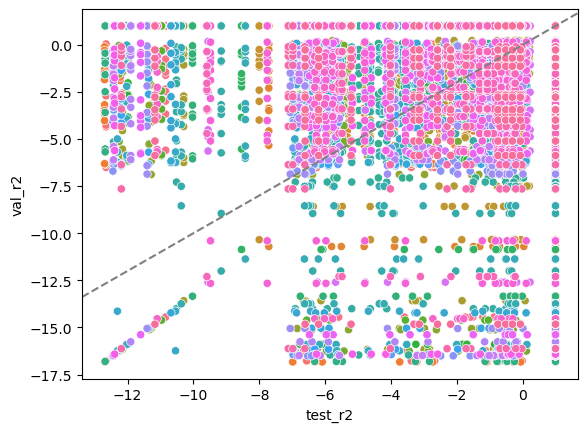

In [23]:
temp = pd.merge(val_r2, test_r2, on="param_number")
ax=sns.scatterplot(data=temp, x="test_r2", y="val_r2", hue="param_number", legend=False)
plt.axline((0,0), slope=1, linestyle="--", color="grey")

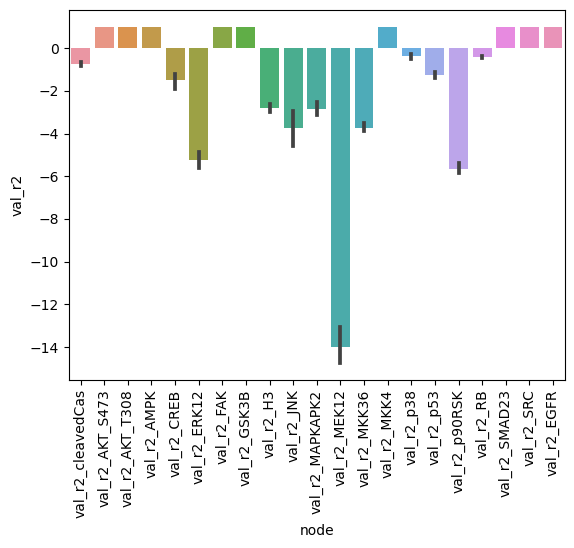

In [17]:
sns.barplot(data=val_r2, x="node", y="val_r2")
t=plt.xticks(rotation=90)

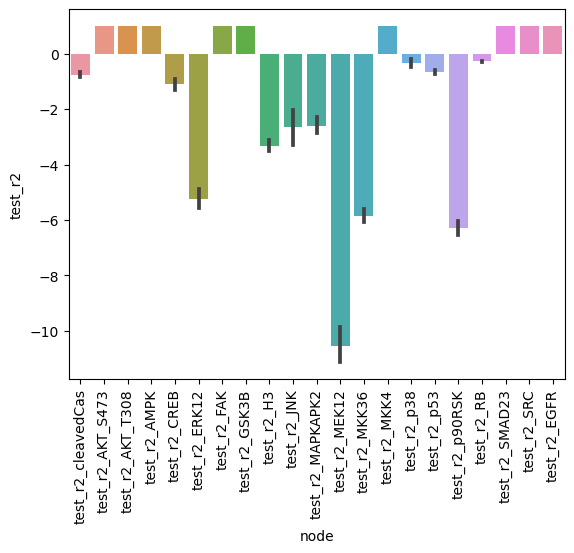

In [18]:
sns.barplot(data=test_r2, x="node", y="test_r2")
t=plt.xticks(rotation=90)

In [93]:
pd.DataFrame(avg_runs.sort_values("valid_loss").iloc[0,:]).T["param_number"]

8    19
Name: param_number, dtype: object

In [60]:
best_run = pd.DataFrame(avg_runs.sort_values("valid_loss").iloc[0,:]).T
best_run_test = pd.melt(frame=best_run, id_vars = "param_number", value_vars=['test_r2_cleavedCas',
       'test_r2_AKT_S473', 'test_r2_AKT_T308', 'test_r2_AMPK', 'test_r2_CREB',
       'test_r2_ERK12', 'test_r2_FAK', 'test_r2_GSK3B', 'test_r2_H3',
       'test_r2_JNK', 'test_r2_MAPKAPK2', 'test_r2_MEK12', 'test_r2_MKK36',
       'test_r2_MKK4', 'test_r2_p38', 'test_r2_p53', 'test_r2_p90RSK',
       'test_r2_RB', 'test_r2_SMAD23', 'test_r2_SRC', 'test_r2_EGFR'], 
        var_name="test_node", value_name="test_r2")
best_run_val = pd.melt(frame=best_run, id_vars = "param_number", value_vars=['val_r2_cleavedCas', 'val_r2_AKT_S473',
       'val_r2_AKT_T308', 'val_r2_AMPK', 'val_r2_CREB', 'val_r2_ERK12',
       'val_r2_FAK', 'val_r2_GSK3B', 'val_r2_H3', 'val_r2_JNK',
       'val_r2_MAPKAPK2', 'val_r2_MEK12', 'val_r2_MKK36', 'val_r2_MKK4',
       'val_r2_p38', 'val_r2_p53', 'val_r2_p90RSK', 'val_r2_RB',
       'val_r2_SMAD23', 'val_r2_SRC', 'val_r2_EGFR'], var_name="val_node", value_name="val_r2")

best_run = pd.concat([best_run_test, best_run_val], axis=1)
best_run["node"] = ["_".join([n.split("_")[1], n.split("_")[2]]) for n in best_run["val_node"]]
best_run

,param_number,test_node,test_r2,param_number,val_node,val_r2,node
0,19,test_r2_cleavedCas,-0.239494,19,val_r2_cleavedCas,-0.26093,r2_cleavedCas
1,19,test_r2_AKT_S473,1.0,19,val_r2_AKT_S473,1.0,r2_AKT
2,19,test_r2_AKT_T308,1.0,19,val_r2_AKT_T308,1.0,r2_AKT
3,19,test_r2_AMPK,1.0,19,val_r2_AMPK,1.0,r2_AMPK
4,19,test_r2_CREB,-0.476271,19,val_r2_CREB,-0.716797,r2_CREB
5,19,test_r2_ERK12,-1.536874,19,val_r2_ERK12,-1.481309,r2_ERK12
6,19,test_r2_FAK,1.0,19,val_r2_FAK,1.0,r2_FAK
7,19,test_r2_GSK3B,1.0,19,val_r2_GSK3B,1.0,r2_GSK3B
8,19,test_r2_H3,-0.773211,19,val_r2_H3,-0.579879,r2_H3
9,19,test_r2_JNK,0.2019,19,val_r2_JNK,0.207931,r2_JNK


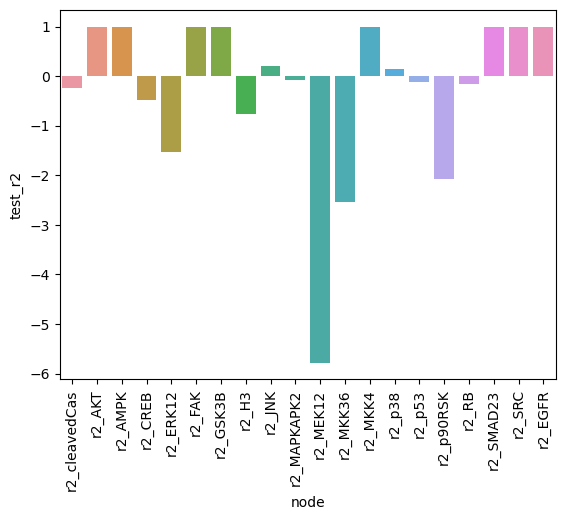

In [61]:
sns.barplot(data=best_run, x="node", y="test_r2")
t=plt.xticks(rotation=90)

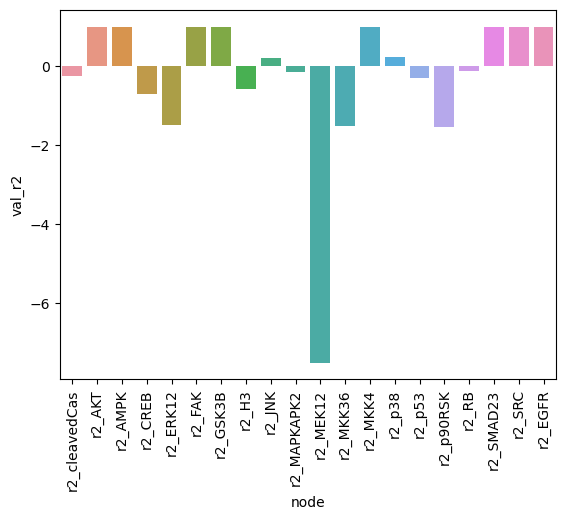

In [62]:
sns.barplot(data=best_run, x="node", y="val_r2")
t=plt.xticks(rotation=90)

In [65]:
root_nodes = ["AKT", "AMPK", "FAK", "GSK3B", "MKK4", "SMAD23", "SRC", "EGFR"]
one_step = ["RB", "ERK12", "JNK", "cleavedCas", "p38"]
two_steps = ["MKK36", "MAPKAPK2", "p90RSK", "p53", "CREB"]
three_steps = ["H3"]
four_steps = ["MEK12"]

node_dist = {k: 0 for k in root_nodes}
node_dist.update({k:1 for k in one_step})
node_dist.update({k:2 for k in two_steps})
node_dist.update({k:3 for k in three_steps})
node_dist.update({k:4 for k in four_steps})

best_run["distance_from_root"] = [node_dist[k.split("_")[1]] for k in best_run["node"]]
best_run

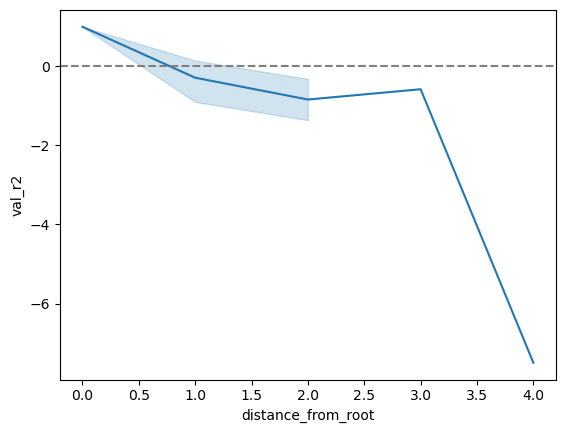

In [74]:
sns.lineplot(data=best_run, x="distance_from_root", y="val_r2")
plt.axhline(y=0, linestyle="--", color="grey")

In [87]:
best_run = pd.DataFrame(avg_runs.sort_values("valid_loss").iloc[0,:]).T
best_run = pd.melt(frame=best_run, id_vars = "param_number", value_vars=['test_mse_cleavedCas',
       'test_mse_AKT_S473', 'test_mse_AKT_T308', 'test_mse_AMPK', 'test_mse_CREB',
       'test_mse_ERK12', 'test_mse_FAK', 'test_mse_GSK3B', 'test_mse_H3',
       'test_mse_JNK', 'test_mse_MAPKAPK2', 'test_mse_MEK12', 'test_mse_MKK36',
       'test_mse_MKK4', 'test_mse_p38', 'test_mse_p53', 'test_mse_p90RSK',
       'test_mse_RB', 'test_mse_SMAD23', 'test_mse_SRC', 'test_mse_EGFR'], 
        var_name="test_node", value_name="test_mse")

best_run["node"] = [n.split("_")[2] for n in best_run["test_node"]]
best_run

/var/folders/54/s3nhktxs0tz7w0f6tsj6pltc0000kp/T/ipykernel_47026/3641546405.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  best_run = pd.melt(frame=best_run, id_vars = "param_number", value_vars=['test_mse_cleavedCas',


,param_number,test_node,test_mse,node
0,19,test_mse_cleavedCas,0.014101,cleavedCas
1,19,test_mse_AKT_S473,0.0,AKT
2,19,test_mse_AKT_T308,0.0,AKT
3,19,test_mse_AMPK,0.0,AMPK
4,19,test_mse_CREB,0.007647,CREB
5,19,test_mse_ERK12,0.039671,ERK12
6,19,test_mse_FAK,0.0,FAK
7,19,test_mse_GSK3B,0.0,GSK3B
8,19,test_mse_H3,0.022097,H3
9,19,test_mse_JNK,0.011296,JNK


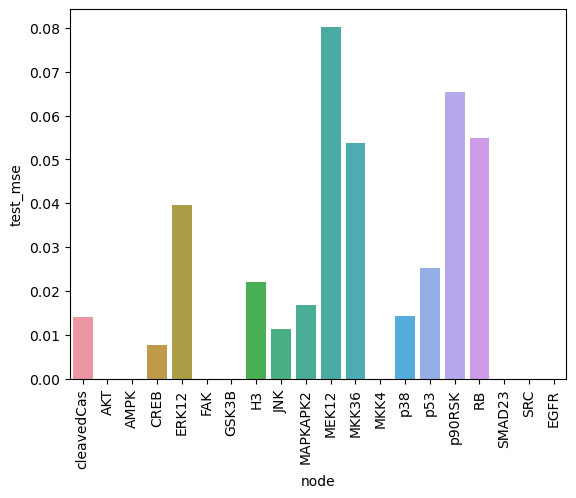

In [88]:
sns.barplot(data=best_run, x="node", y="test_mse")
t=plt.xticks(rotation=90)

In [90]:
root_nodes = ["AKT", "AMPK", "FAK", "GSK3B", "MKK4", "SMAD23", "SRC", "EGFR"]
one_step = ["RB", "ERK12", "JNK", "cleavedCas", "p38"]
two_steps = ["MKK36", "MAPKAPK2", "p90RSK", "p53", "CREB"]
three_steps = ["H3"]
four_steps = ["MEK12"]

node_dist = {k: 0 for k in root_nodes}
node_dist.update({k:1 for k in one_step})
node_dist.update({k:2 for k in two_steps})
node_dist.update({k:3 for k in three_steps})
node_dist.update({k:4 for k in four_steps})

best_run["distance_from_root"] = [node_dist[k] for k in best_run["node"]]
best_run

,param_number,test_node,test_mse,node,distance_from_root
0,19,test_mse_cleavedCas,0.014101,cleavedCas,1
1,19,test_mse_AKT_S473,0.0,AKT,0
2,19,test_mse_AKT_T308,0.0,AKT,0
3,19,test_mse_AMPK,0.0,AMPK,0
4,19,test_mse_CREB,0.007647,CREB,2
5,19,test_mse_ERK12,0.039671,ERK12,1
6,19,test_mse_FAK,0.0,FAK,0
7,19,test_mse_GSK3B,0.0,GSK3B,0
8,19,test_mse_H3,0.022097,H3,3
9,19,test_mse_JNK,0.011296,JNK,1


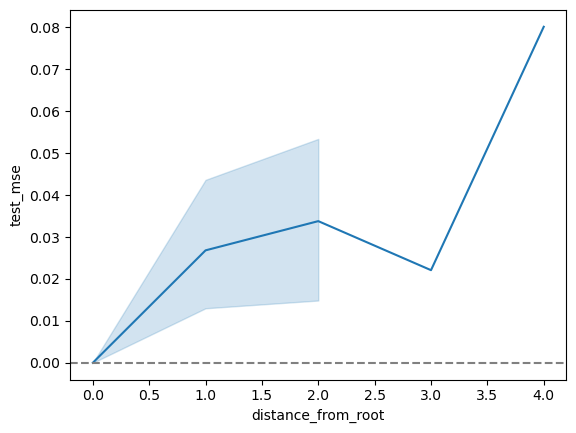

In [91]:
sns.lineplot(data=best_run, x="distance_from_root", y="test_mse")
plt.axhline(y=0, linestyle="--", color="grey")